In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

file_path = 'possum.csv'
data = pd.read_csv(file_path)
data = data.drop(columns=['Unnamed: 0'])

data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [113]:
data.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [114]:
data.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

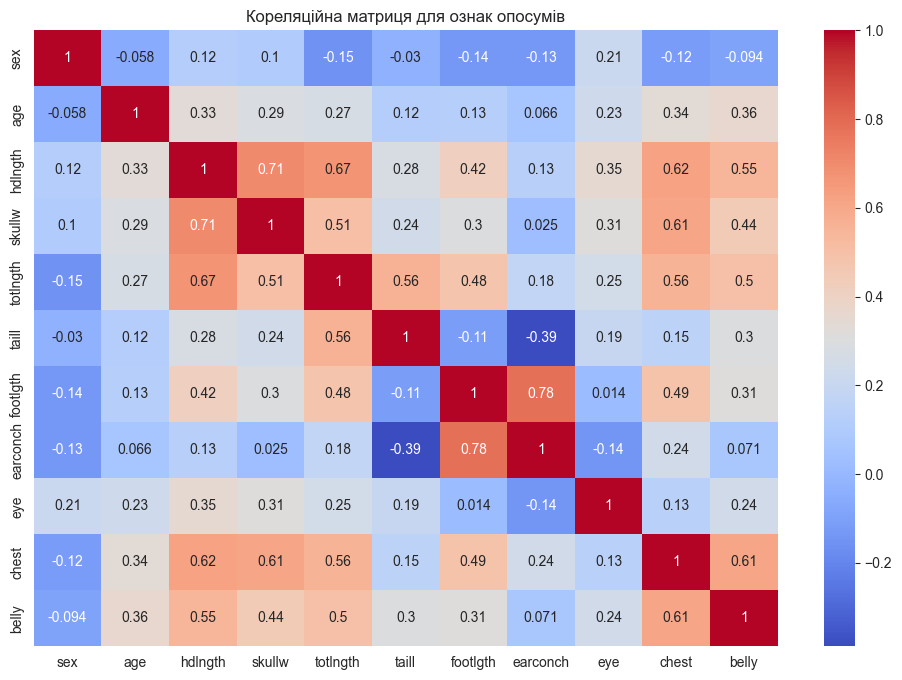

In [115]:
data_clean = data.drop(['case', 'site', 'Pop'], axis=1)
data_clean['sex'] = data_clean['sex'].map({'m': 1, 'f': 0})
correlation_matrix = data_clean.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця для ознак опосумів")
plt.show()

Correlation coefficient:  0.42975778322201125
R^2:  -0.11509975421915031
Variance %:  0.09102200693690399
MAE:  1.5978851220396584
RMSE:  1.3907965216053377


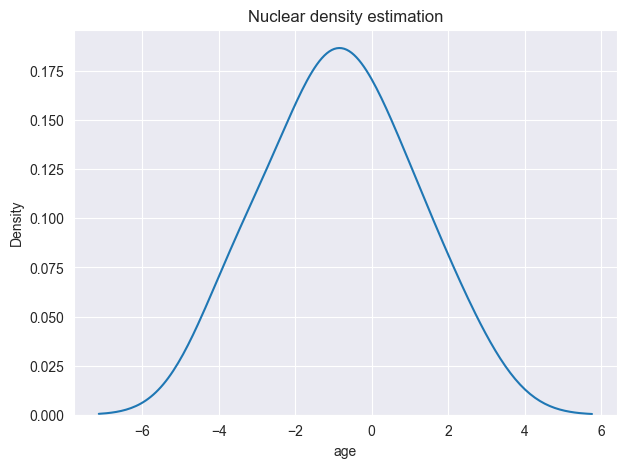

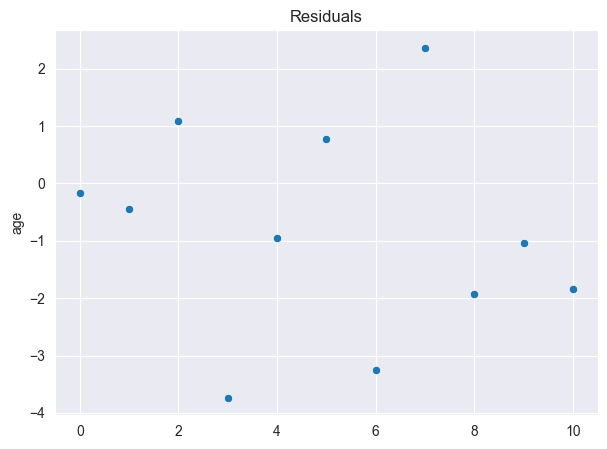

In [116]:
import numpy as np
# Defining independent and dependent variables
x = data_clean[['belly', 'chest']]
y = data_clean['age']

# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Creating the model
model = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]).fit(x_train, y_train)

# Predicting the values
predictions = model.predict(x_test)

# Printing the results
print('Correlation coefficient: ', np.corrcoef(y_test, predictions)[0, 1])
# Determination coefficient
print('R^2: ', r2_score(y_test, predictions))
print('Variance %: ', explained_variance_score(y_test, predictions))
# Mean absolute error
print('MAE: ', mean_absolute_error(y_test, predictions))
# Mean squared error
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions, squared=False)))

res = y_test - predictions

plt.figure(figsize=(7, 5))
sns.kdeplot(res)
plt.title('Nuclear density estimation')
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x=range(len(res)), y=res)
plt.title('Residuals')
plt.show()

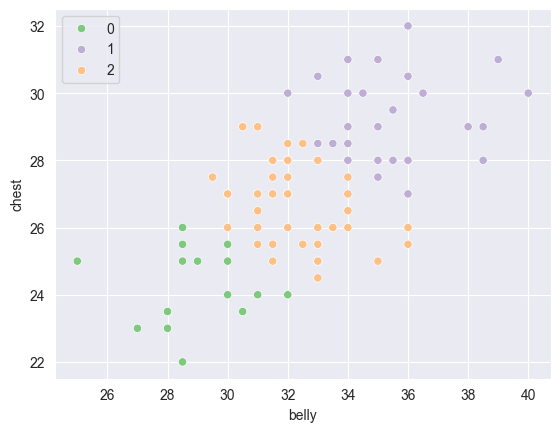

In [117]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Clasterization
km_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=3, random_state=0))])

km_data = data[['belly', 'chest']]
km_pipeline.fit(km_data)

sns.scatterplot(x=km_data.belly,y=km_data.chest, hue=km_pipeline.predict(km_data), palette='Accent')
plt.show()